In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

In [3]:
%time df = pd.read_feather('tmp/raw_processed')
df.head(3)

CPU times: total: 31.2 ms
Wall time: 47 ms


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,3,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09,False,False
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,3,1725,527,55,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09,False,False
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09,False,False


In [4]:
df.shape

(401125, 67)

In [5]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.00000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05
mean,1.919713e+06,10.103096,1.217903e+06,6889.702980,134.665810,6.327332,1899.156901,1.230726e+03,0.376102,1673.709485,559.165442,36.685036,9.192686,12.233433,1.818219,32.262222,23.508318,3.725524,3.725524,0.809299,3.605195,0.513192,0.422315,0.566736,0.319010,3.372502,0.207060,0.064184,0.235228,0.178436,0.066067,4.253801,0.07722,0.552434,0.094088,0.090179,3.059847,1.511791,0.115889,0.115199,0.321483,0.458792,4.311895,6.535564,0.685153,0.516719,0.319479,0.196178,1.278128,1.132009,0.683189,0.344987,2004.095728,6.407035,26.179864,16.110402,2.600975,179.977581,1.091433e+09
std,9.090215e+05,0.693621,4.409920e+05,6221.777842,8.962237,16.575066,291.797469,1.654290e+04,0.870291,1263.331163,469.310266,38.228243,27.006859,29.041950,2.107830,22.596618,15.732898,1.725772,1.725772,1.436850,2.220353,0.564375,0.873469,0.822794,0.678752,3.764052,0.428657,0.250385,1.025710,0.697879,0.260948,4.809368,0.31616,0.988317,0.384207,0.382552,5.950781,1.450320,0.342865,0.340769,0.926401,0.819459,7.741894,11.923308,1.226899,0.912594,0.659002,0.397231,2.649002,2.307099,1.501999,0.755775,5.754190,3.424575,14.788059,8.427322,1.405763,103.559930,1.816977e+08
min,1.139246e+06,8.465900,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,1.000000,0.000000,2.000000,6.009984e+08
25%,1.418371e+06,9.581904,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,0.000000,631.000000,206.000000,0.000000,0.000000,0.000000,0.000000,11.000000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,13.000000,9.000000,2.000000,84.000000,9.708768e+08
50%,1.639422e+06,10.085809,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000000,1395.000000,406.000000,29.000000,0.000000,0.000000,0.

In [75]:
df.loc[df['YearMade'] < 1930, 'YearMade'] = 1930
df['age'] = df.saleYear - df.YearMade
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,Transmission,Hydraulics,Tire_Size,Undercarriage_Pad_Width,Stick_Length,Blade_Type,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na,UsageBand_High,UsageBand_Medium,UsageBand_Low,UsageBand_nan,ProductSize_Compact,ProductSize_Large,ProductSize_Large / Medium,ProductSize_Medium,ProductSize_Mini,ProductSize_Small,ProductSize_nan,ProductGroup_BL,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL,ProductGroup_nan,ProductGroupDesc_Backhoe Loaders,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader,ProductGroupDesc_nan,Drive_System_All Wheel Drive,Drive_System_Four Wheel Drive,Drive_System_No,Drive_System_Two Wheel Drive,Drive_System_nan,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS,Enclosure_nan,Forks_None or Unspecified,Forks_Yes,Forks_nan,Pad_Type_Grouser,Pad_Type_None or Unspecified,Pad_Type_Reversible,Pad_Type_Street,Pad_Type_nan,Ride_Control_No,Ride_Control_None or Unspecified,Ride_Control_Yes,Ride_Control_nan,Stick_Extended,Stick_Standard,Stick_nan,Turbocharged_None or Unspecified,Turbocharged_Yes,Turbocharged_nan,Blade_Extension_None or Unspecified,Blade_Extension_Yes,Blade_Extension_nan,Blade_Width_12',Blade_Width_13',Blade_Width_14',Blade_Width_16',Blade_Width_<12',Blade_Width_None or Unspecified,Blade_Width_nan,Enclosure_Type_High Profile,Enclosure_Type_Low Profile,Enclosure_Type_None or Unspecified,Enclosure_Type_nan,Engine_Horsepower_No,Engine_Horsepower_Variable,Engine_Horsepower_nan,Pushblock_None or Unspecified,Pushblock_Yes,Pushblock_nan,Ripper_Multi Shank,Ripper_None or Unspecified,Ripper_Single Shank,Ripper_Yes,Ripper_nan,Scarifier_None or Unspecified,Scarifier_Yes,Scarifier_nan,Tip_Control_None or Unspecified,Tip_Control_Sideshift & Tip,Tip_Control_Tip,Tip_Control_nan,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified,Coupler_nan,Coupler_System_None or Unspecified,Coupler_System_Yes,Coupler_System_nan,Grouser_Tracks_None or Unspecified,Grouser_Tracks_Yes,Grouser_Tracks_nan,Hydraulics_Flow_High Flow,Hydraulics_Flow_None or Unspecified,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Track_Type_Rubber,Track_Type_Steel,Track_Type_nan,Thumb_Hydraulic,Thumb_Manual,Thumb_None or Unspecified,Thumb_nan,Pattern_Changer_No,Pattern_Changer_None or Unspecified,Pattern_Changer_Yes,Pattern_Changer_nan,Grouser_Type_Double,Grouser_Type_Single,Grouser_Type_Triple,Grouser_Type_nan,Backhoe_Mounting_None or Unspecified,Backhoe_Mounting_Yes,Backhoe_Mounting_nan,Travel_Controls_1 Speed,Travel_Controls_2 Pedal,Travel_Controls_Differential Steer,Travel_Controls_Finger Tip,Travel_Controls_Lever,Travel_Controls_None or Unspecified,Travel_Controls_Pedal,Travel_Controls_nan,Differential_Type_Limited Slip,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Differential_Type_nan,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel,Steering_Controls_nan,age
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,950,296,41,0,0,59,1,0,1,17,0,0,0,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,

In [76]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,Transmission,Hydraulics,Tire_Size,Undercarriage_Pad_Width,Stick_Length,Blade_Type,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,age
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000
mean,1.919713e+06,10.103096,1.217903e+06,6889.702980,134.665810,6.327332,1987.691939,1.230726e+03,1673.709485,559.165442,36.685036,9.192686,12.233433,32.262222,23.508318,3.372502,4.253801,3.059847,4.311895,6.535564,1.278128,2004.095728,6.407035,26.179864,16.110402,2.600975,179.977581,1.091433e+09,16.403789
std,9.090215e+05,0.693621,4.409920e+05,6221.777842,8.962237,16.575066,20.844523,1.654290e+04,1263.331163,469.310266,38.228243,27.006859,29.041950,22.596618,15.732898,3.764052,4.809368,5.950781,7.741894,11.923308,2.649002,5.754190,3.424575,14.788059,8.427322,1.405763,103.559930,1.816977e+08,20.429022
min,1.139246e+06,8.465900,0.000000e+00,28.000000,121.000000,0.000000,1930.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,1.000000,0.000000,2.000000,6.009984e+08,-12.000000
25%,1.418371e+06,9.581904,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,631.000000,206.000000,0.000000,0.000000,0.000000,11.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,13.000000,9.000000,2.000000,84.000000,9.708768e+08,5.000000
50%,1.639422e+06,10.085809,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,1395.000000,406.000000,29.000000,0.000000,0.000000,35.000000,22.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,6.000000,25.000000,16.000000,3.000000,168.000000,1.143072e+09,9.000000
75%,2.242707e+06,10.596635,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,0.000000e+00,2292.000000,704.000000,57.000000,0.000000,0.000000,52.000000,41.000000,8.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,9.000000,39.000000,23.000000,3.000000,271.000000,1.237853e+09,16.000000
max,6.333342e+06,11.863582,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06,4999.000000,1950.000000,175.000000,122.000000,139.000000,74.000000,53.000000,8.000000,12.000000,17.000000,19.000000,29.000000,10.000000,2011.000000,12.000000,53.000000,31.000000,6.000000,365.000000,1.325203e+09,81.000000


## Input/Output & Train/Validation

In [6]:
X = df.drop(["SalePrice"], axis=1)
y = df.SalePrice

In [7]:
def split_vals(a, n, seed=None):
    np.random.seed(seed)  # Setting the random seed
    return a[:n].copy(), a[n:].copy()

In [8]:
n_valid = 12000
n_trn = len(df) - n_valid
train, valid = split_vals(df, n_trn, 22)
train.shape, valid.shape

((389125, 67), (12000, 67))

In [9]:
X_train = train.drop(["SalePrice"], axis=1)
y_train = train.SalePrice
X_valid = valid.drop(["SalePrice"], axis=1)
y_valid = valid.SalePrice

In [10]:
X_train.shape, X_valid.shape

((389125, 66), (12000, 66))

In [11]:
y_train.shape, y_valid.shape

((389125,), (12000,))

In [12]:
X_train.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int32

## Make a prototype model

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=40, oob_score=True, max_samples=50000, n_jobs=-1)

In [14]:
%time model.fit(X_train, y_train)

CPU times: total: 1min 21s
Wall time: 17.7 s


RandomForestRegressor(max_samples=50000, n_estimators=40, n_jobs=-1,
                      oob_score=True)

## Evaluation

In [15]:
import math
from sklearn.metrics import r2_score

def rmse(x, y): return math.sqrt(((x-y)**2).mean())
def print_score(model):
    res = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_valid), y_valid),
           r2_score(model.predict(X_train), y_train), r2_score(model.predict(X_valid), y_valid)]
    if model.oob_score:
        res.append(model.oob_score_)
    return res

In [16]:
print_score(model)

[0.19724111693462773,
 0.24995606659898634,
 0.9058118096911103,
 0.8610113014880222,
 0.895265986106899]

## Feature Importance

In [17]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [18]:
fi = rf_feat_importance(model, X)
fi[:10]

,cols,imp
37,Coupler_System,0.198655
5,YearMade,0.176767
13,ProductSize,0.117249
14,fiProductClassDesc,0.099583
2,ModelID,0.089774
63,saleElapsed,0.074672
19,Enclosure,0.036143
8,fiModelDesc,0.027436
10,fiSecondaryDesc,0.025967
0,SalesID,0.025646


<Axes: xlabel='cols'>

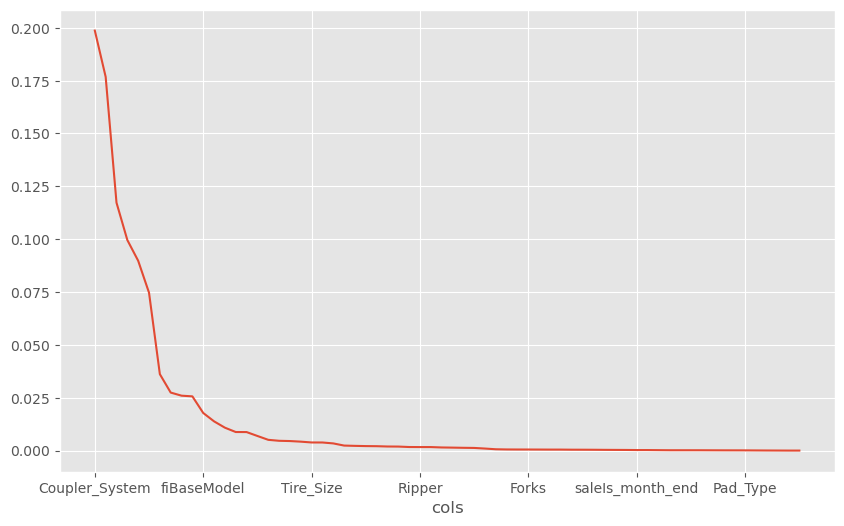

In [19]:
fi.plot('cols', 'imp', figsize=(10, 6), legend=False)

<Axes: ylabel='cols'>

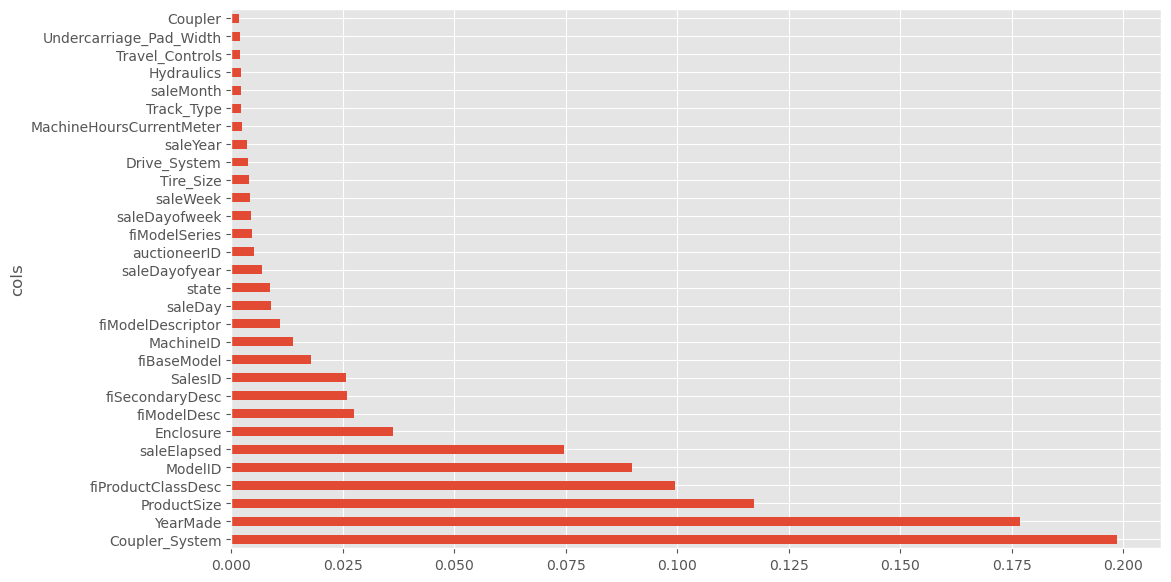

In [20]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

In [31]:
to_keep = fi[fi.imp > 0.002].cols
X_keep = df[to_keep]
len(to_keep)

27

## Remove Duplicates

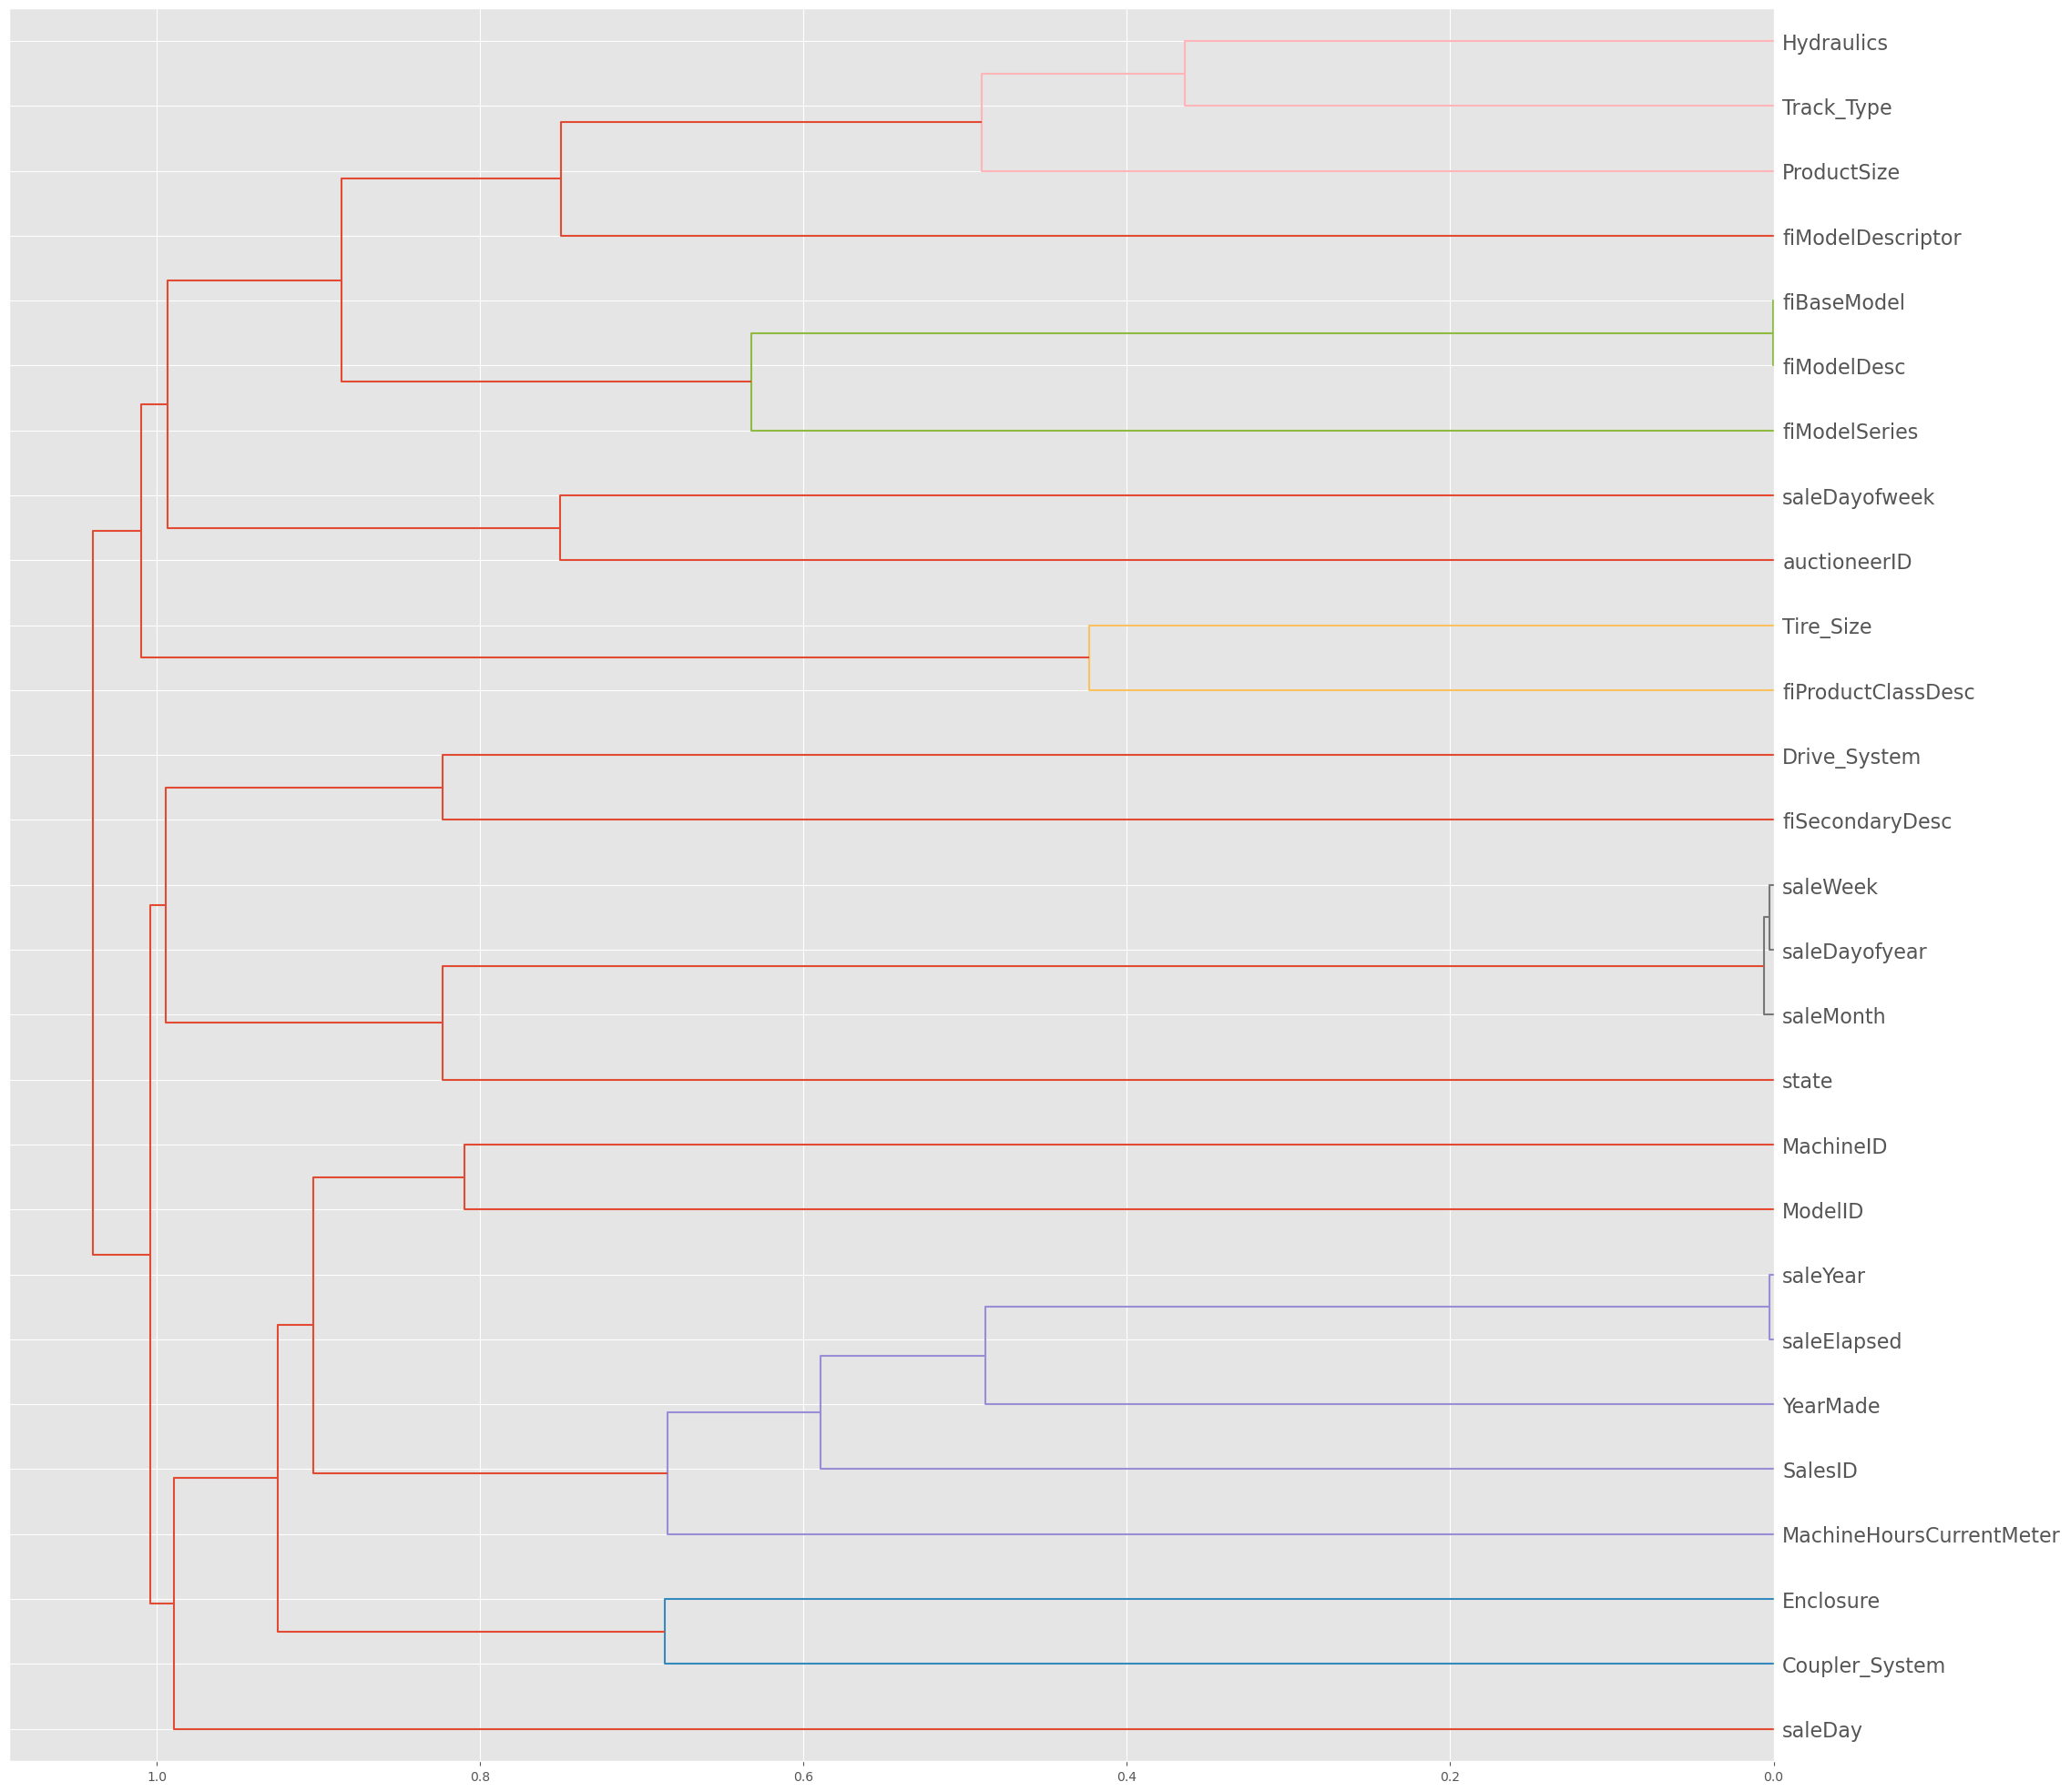

In [32]:
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
#corr = np.nan_to_num(corr)
corr_condensed = hc.distance.squareform(1-corr, checks=False)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(25,25))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [33]:
X_keep = X_keep.drop(["saleYear", "fiBaseModel", "saleWeek"], axis=1)

### Make model again

In [34]:
X_keep.shape

(401125, 24)

In [35]:
n_valid = 12000
n_trn = len(X_keep) - n_valid
X_train, X_valid = split_vals(X_keep, n_trn)
X_train.shape, X_valid.shape

((389125, 24), (12000, 24))

In [36]:
model = RandomForestRegressor(n_estimators=80, n_jobs=-1, min_samples_leaf=3, max_features=0.5, oob_score=True)

In [37]:
%time model.fit(X_train, y_train)

CPU times: total: 3min 51s
Wall time: 37.5 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=80,
                      n_jobs=-1, oob_score=True)

In [38]:
print_score(model)

[0.12025675953824717,
 0.22682070111475044,
 0.9668731162459114,
 0.8896896667730808,
 0.912920691952444]

### Calculate feature importance again

In [39]:
fi = rf_feat_importance(model, X_keep)
fi[:10]

,cols,imp
1,YearMade,0.168314
0,Coupler_System,0.142620
2,ProductSize,0.125524
3,fiProductClassDesc,0.077710
5,saleElapsed,0.071971
8,fiSecondaryDesc,0.066337
6,Enclosure,0.060179
4,ModelID,0.053295
7,fiModelDesc,0.048486
9,SalesID,0.034368


<Axes: ylabel='cols'>

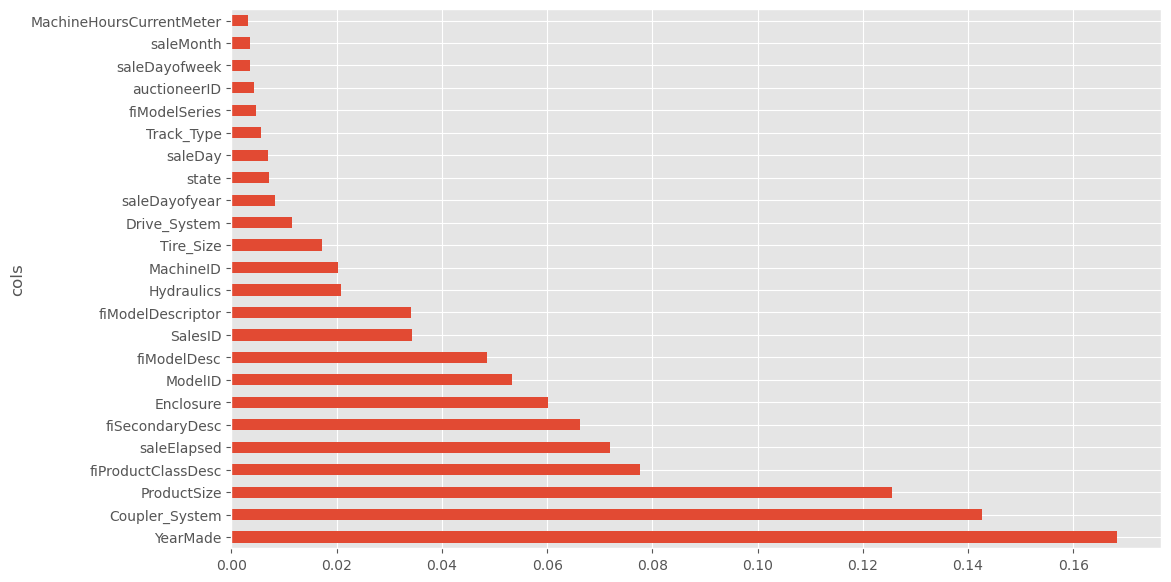

In [40]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

## Confidence based on tree variance

In [41]:
raw_data = pd.read_feather("tmp/raw")
raw_data.SalePrice = np.log(raw_data.SalePrice)
raw_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,None,None,None,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,None,EROPS w AC,None or Unspecified,None,None or Unspecified,None,None,None,None,None,None,None,2 Valve,None,None,None,None,None or Unspecified,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,None,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,None,EROPS w AC,None or Unspecified,None,None or Unspecified,None,None,None,None,None,None,None,2 Valve,None,None,None,None,23.5,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,None,None,None,None,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,None,OROPS,None or Unspecified,None,None,None,None,None,None,None,None,None,Auxiliary,None,None,None,None,None,None or Unspecified,None or Unspecified,None or Unspecified,Standard,None,None,None,None,None,None,None,None,None,None,None,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,None,-6E,None,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,None,EROPS w AC,None,None,None,None,None,None,None,None,None,None,2 Valve,None,None,None,None,None,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,None,None,None,None,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,None,EROPS,None or Unspecified,None,None,None,None,None,None,None,None,None,Auxiliary,None,None,None,None,None,None or Unspecified,None or Unspecified,None or Unspecified,Standard,None,None,None,None,None,None,None,None,None,None,None,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09


In [42]:
n_valid = 12000
n_trn = len(raw_data) - n_valid
train, valid = split_vals(raw_data, n_trn)
train.shape, valid.shape

((389125, 65), (12000, 65))

### How confident are we in Enclosure_Erops w AC ?

In [43]:
raw_data.Enclosure.value_counts()

Enclosure
OROPS                  173932
EROPS                  139026
EROPS w AC              87820
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

In [44]:
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_])

In [45]:
x = valid.copy()
x["pred"] = np.mean(preds, axis=0)
x["pred_std"] = np.std(preds, axis=0)

In [46]:
flds = ["Enclosure", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [47]:
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.841773,0.245572
1,EROPS w AC,10.623971,10.600517,0.236149
2,OROPS,9.682064,9.686559,0.205874


***We are confident of results comming from data points with an Enclosure of OROPS more the with Erops w AC/EROPS (Small standard deviation == Small Confidence Interval)***

<Axes: ylabel='Enclosure'>

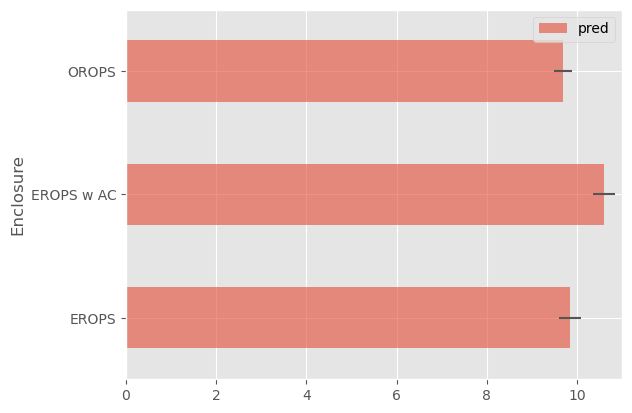

In [48]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11))

### How confident are we in Coupler System ?

In [49]:
flds = ["Coupler_System", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [50]:
enc_summ

,Coupler_System,SalePrice,pred,pred_std
0,None or Unspecified,9.253847,9.268990,0.199704
1,Yes,9.327597,9.317239,0.201282


***We are confident of results comming from data points with an ProductGroupDesc of Skid Steer Loaders (Small standard deviation == Small Confidence Interval)***

<Axes: ylabel='Coupler_System'>

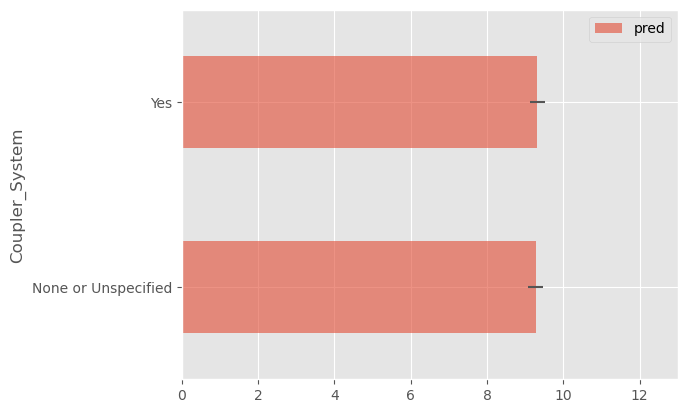

In [51]:
enc_summ.plot('Coupler_System', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,13))

### How confident are we in Product Size ?

In [53]:
flds = ["ProductSize", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [54]:
enc_summ

,ProductSize,SalePrice,pred,pred_std
0,Compact,9.735093,9.825475,0.298956
1,Large,10.470589,10.420330,0.322098
2,Large / Medium,10.691871,10.664380,0.265889
3,Medium,10.681511,10.639833,0.249841
4,Mini,9.535147,9.554481,0.220729
5,Small,10.324448,10.341830,0.272159


***We may not be too confident of results comming from data points with an ProductSize of Large***

<Axes: ylabel='ProductSize'>

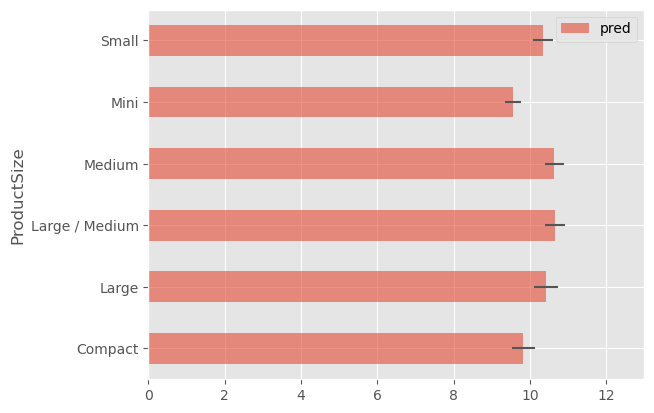

In [55]:
enc_summ.plot('ProductSize', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,13))